In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train_ctrUa4K.csv')

In [3]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
test_data = pd.read_csv('test_lAUu6dG.csv')
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [5]:
train_og = train_data.copy()
test_og = test_data.copy()

In [7]:
train_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: >

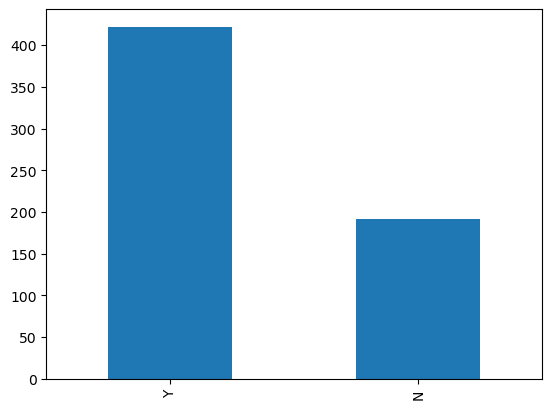

In [8]:
train_data['Loan_Status'].value_counts().plot.bar()

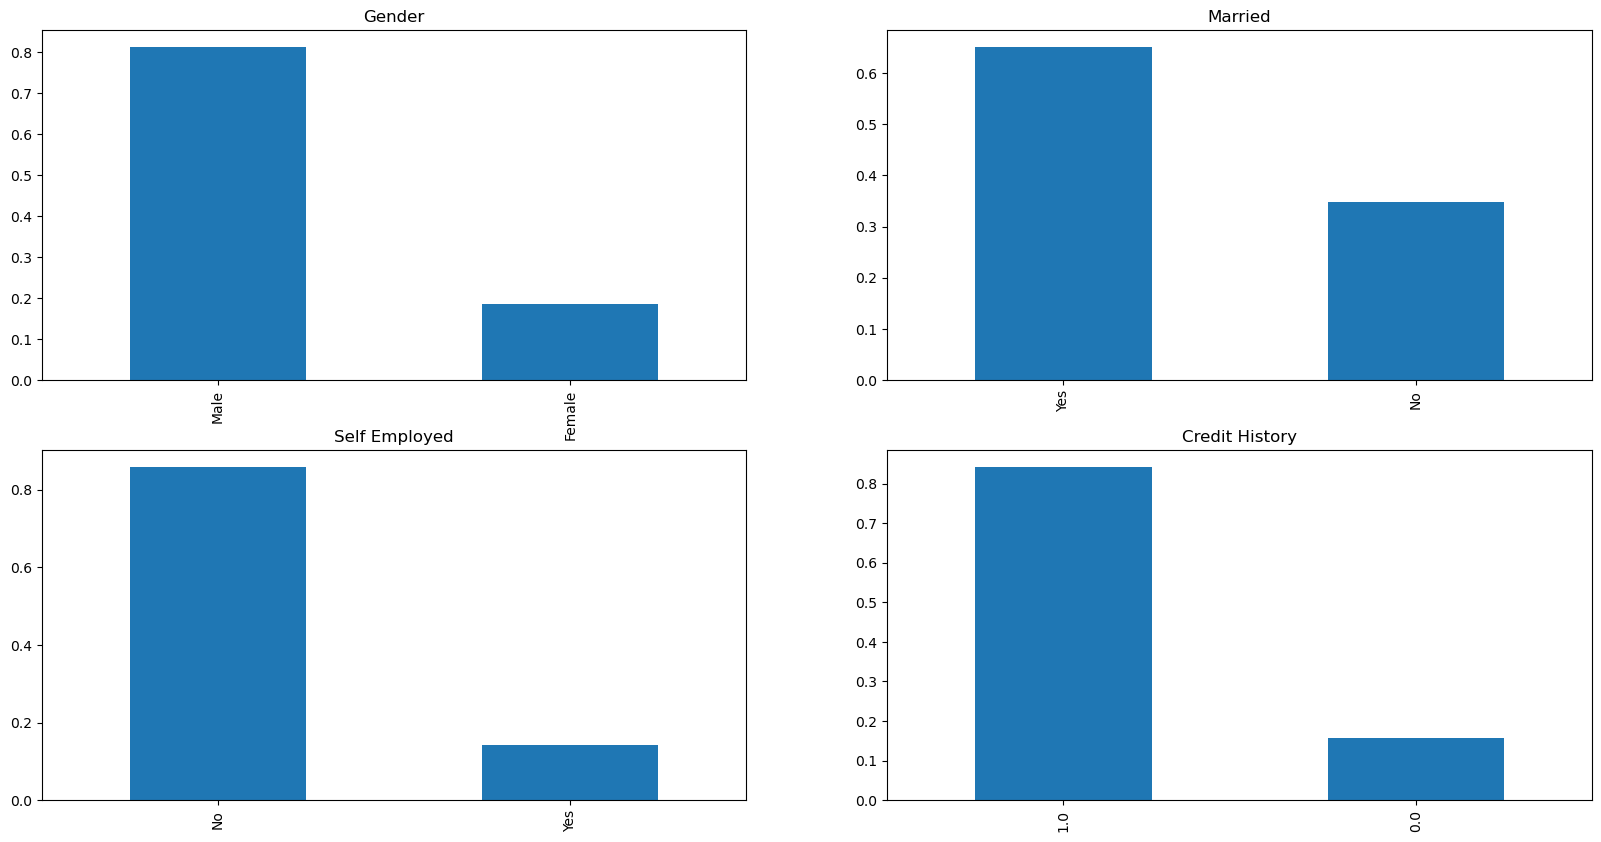

In [9]:
plt.figure(1) 
plt.subplot(221)
train_data['Gender'].value_counts(normalize = True).plot.bar(figsize=(20,10),title = 'Gender')
plt.subplot(222)
train_data['Married'].value_counts(normalize = True).plot.bar(title = 'Married')
plt.subplot(223)
train_data['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self Employed')
plt.subplot(224)
train_data['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit History')
plt.show()

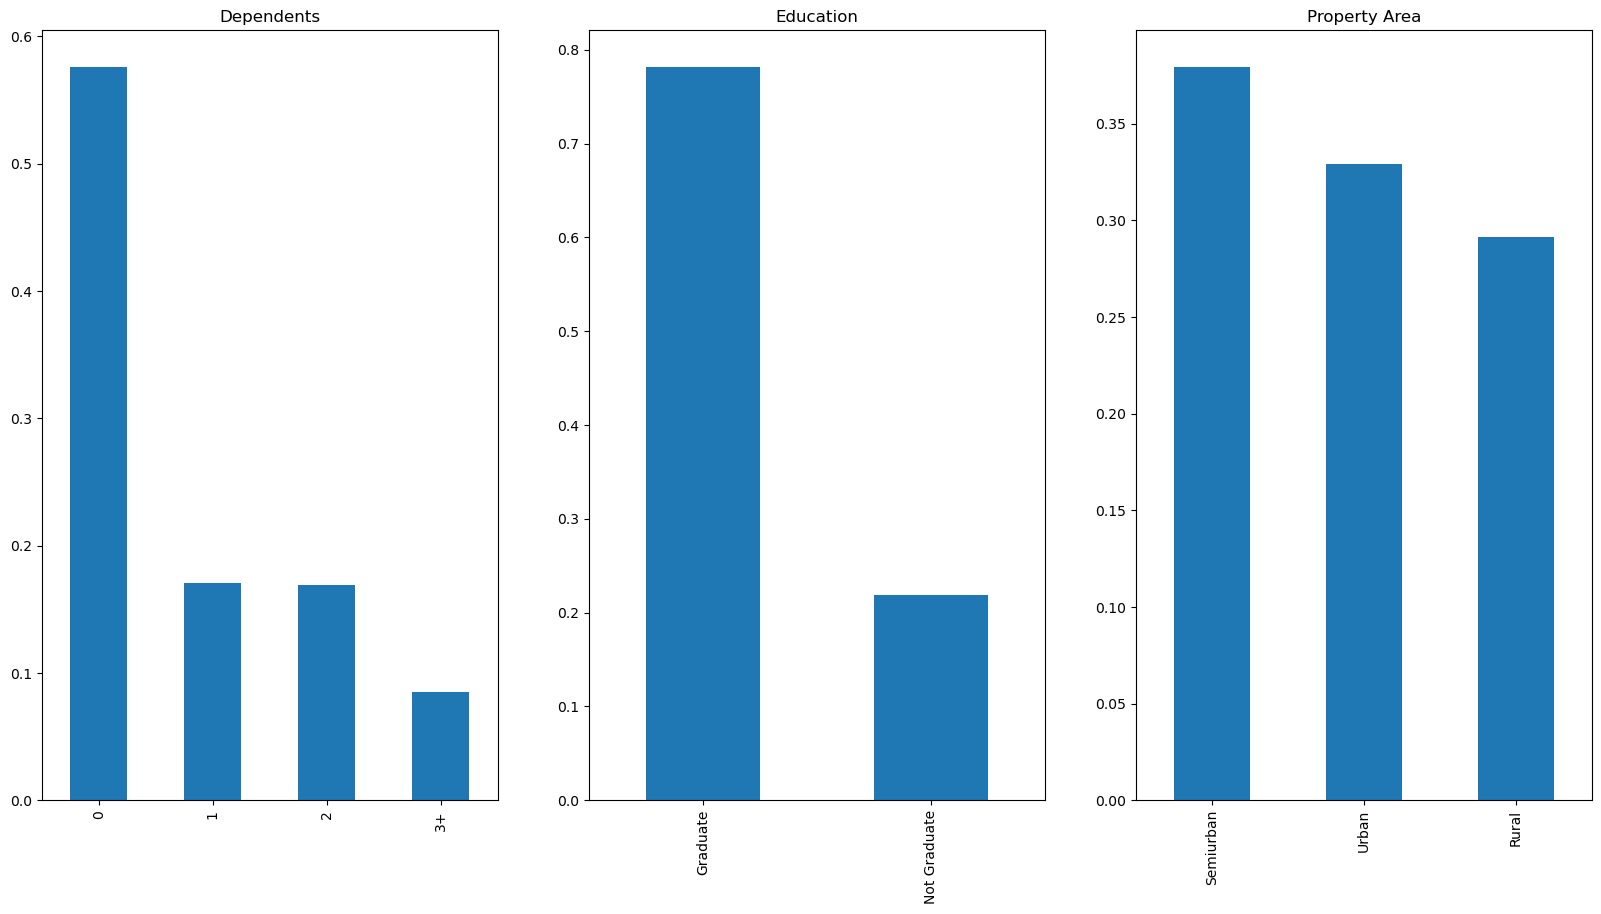

In [10]:
plt.figure(1) 
plt.subplot(131)
train_data['Dependents'].value_counts(normalize = True).plot.bar(figsize=(20,10),title = 'Dependents')
plt.subplot(132)
train_data['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(133)
train_data['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property Area')
plt.show()

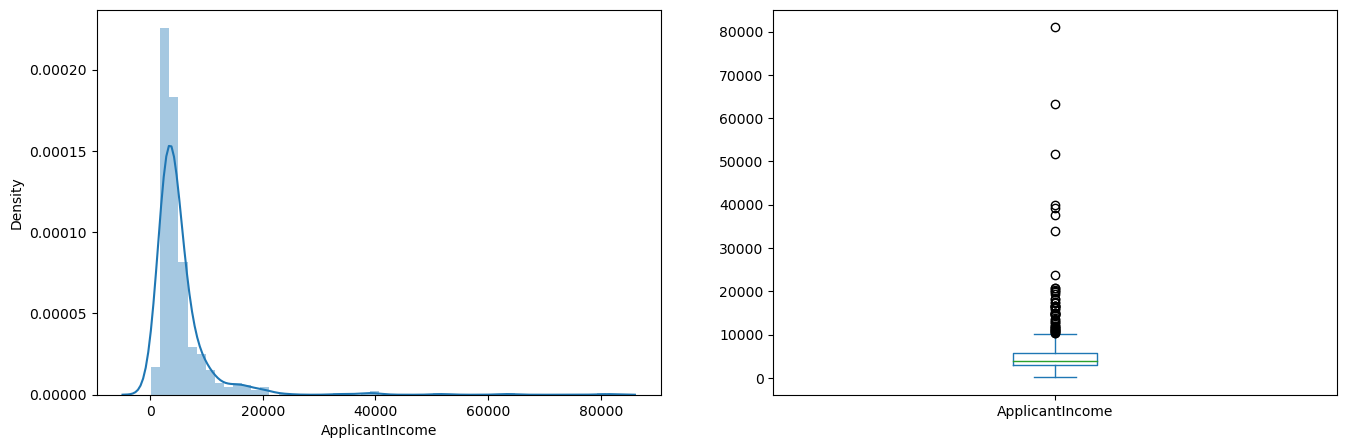

In [11]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['ApplicantIncome'])
plt.subplot(122)
train_data['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

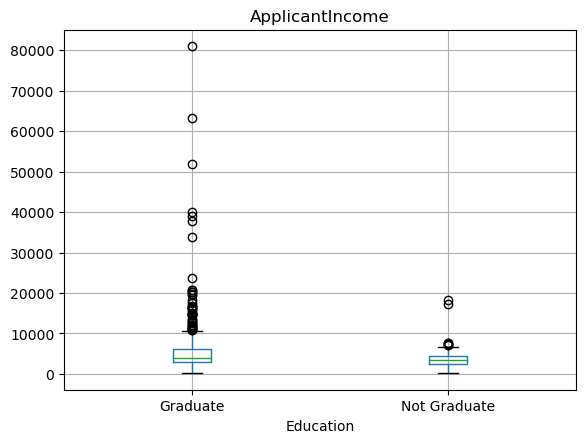

In [12]:
train_data.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("") 

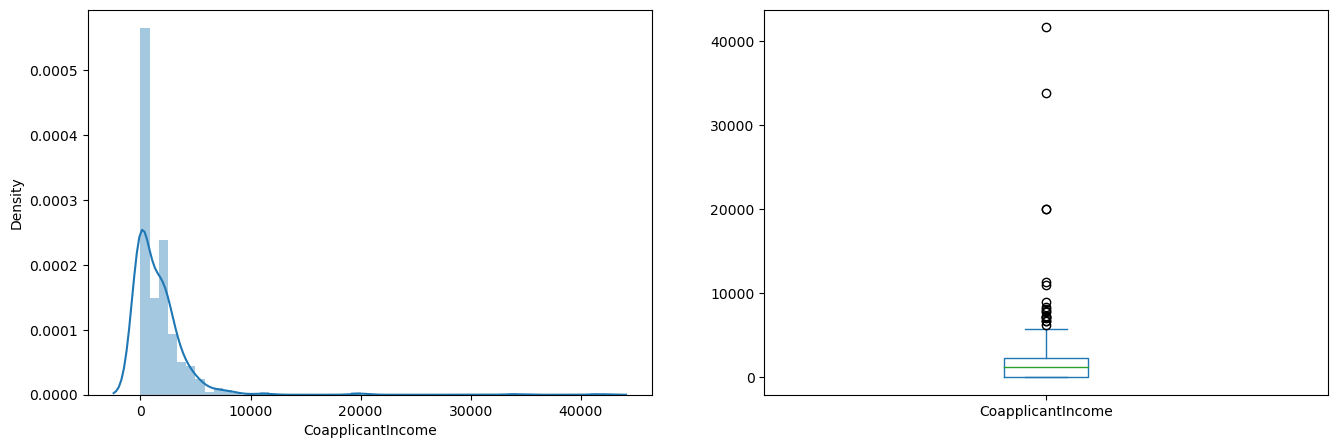

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['CoapplicantIncome'])
plt.subplot(122)
train_data['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

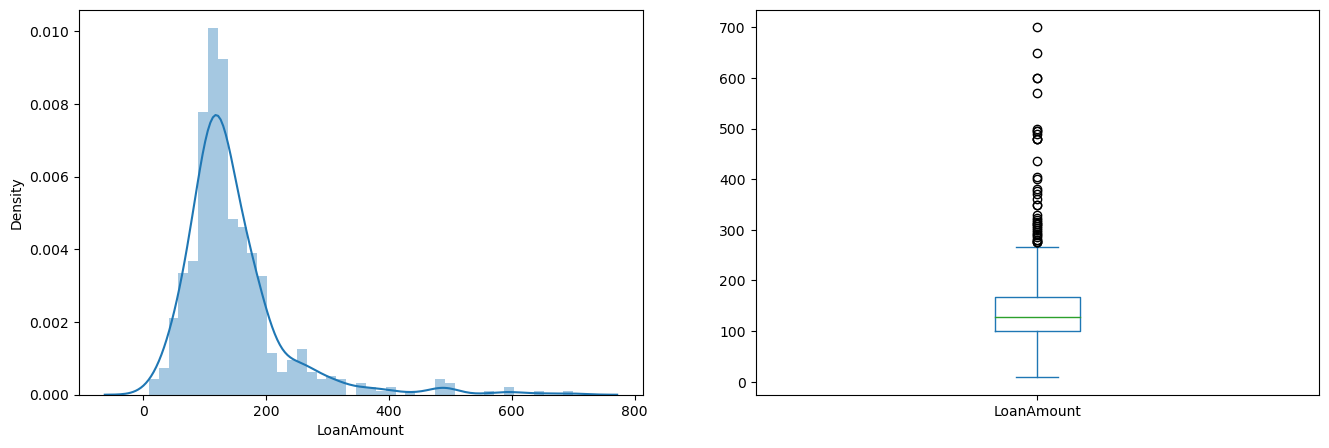

In [14]:
plt.figure(1)
plt.subplot(121)
df = train_data.dropna()
sns.distplot(train_data['LoanAmount'])
plt.subplot(122)
train_data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

<Axes: xlabel='Gender'>

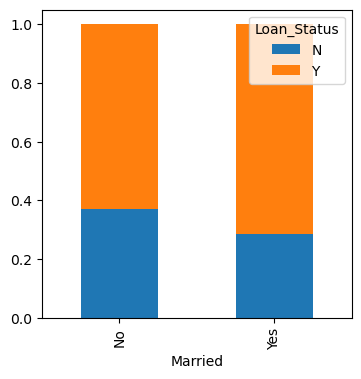

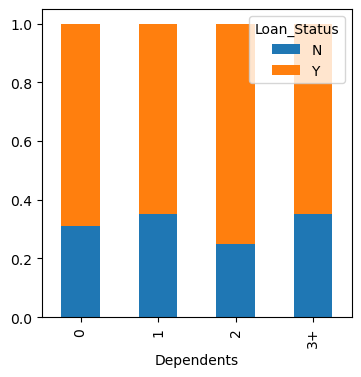

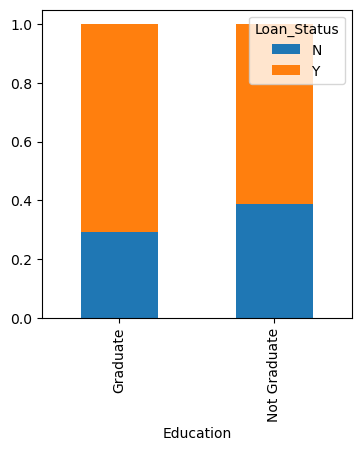

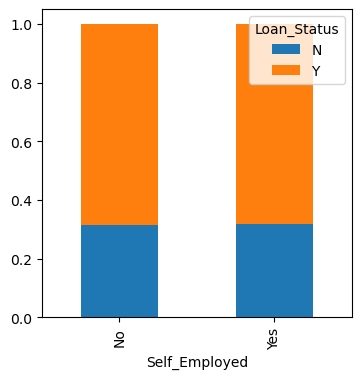

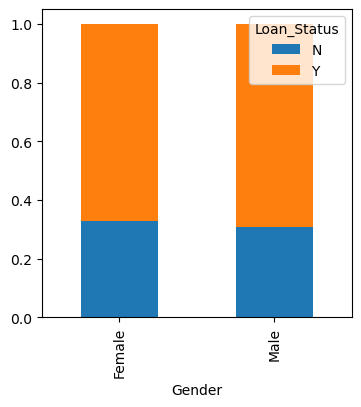

In [16]:
Gender = pd.crosstab(train_data['Gender'],train_data['Loan_Status'])
Married = pd.crosstab(train_data['Married'],train_data['Loan_Status'])
Dependents = pd.crosstab(train_data['Dependents'],train_data['Loan_Status'])
Education = pd.crosstab(train_data['Education'],train_data['Loan_Status'])
Self_Employed = pd.crosstab(train_data['Self_Employed'],train_data['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis = 0).plot(kind='bar',stacked= True, figsize =(4,4))
Dependents.div(Dependents.sum(1).astype(float),axis = 0).plot(kind='bar',stacked= True, figsize =(4,4))
Education.div(Education.sum(1).astype(float),axis = 0).plot(kind='bar',stacked= True, figsize =(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float),axis = 0).plot(kind='bar',stacked= True, figsize =(4,4))
Gender.div(Gender.sum(1).astype(float),axis = 0).plot(kind='bar',stacked= True, figsize =(4,4))

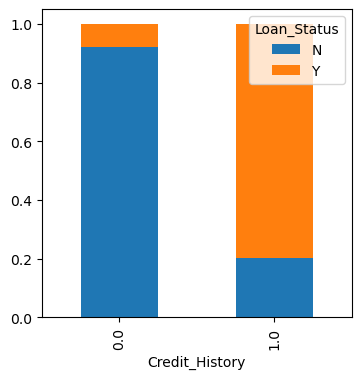

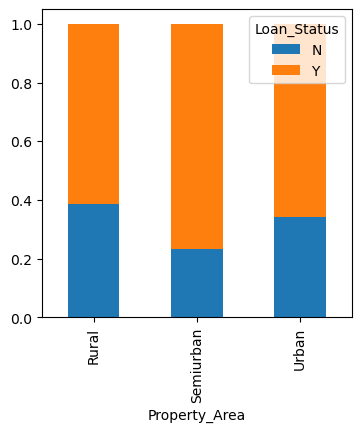

In [17]:
Credit_History = pd.crosstab(train_data['Credit_History'],train_data['Loan_Status'])
Property_Area = pd.crosstab(train_data['Property_Area'],train_data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis = 0).plot(kind='bar',stacked= True, figsize =(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis = 0).plot(kind='bar',stacked= True, figsize =(4,4))
plt.show()

<Axes: xlabel='Loan_Status'>

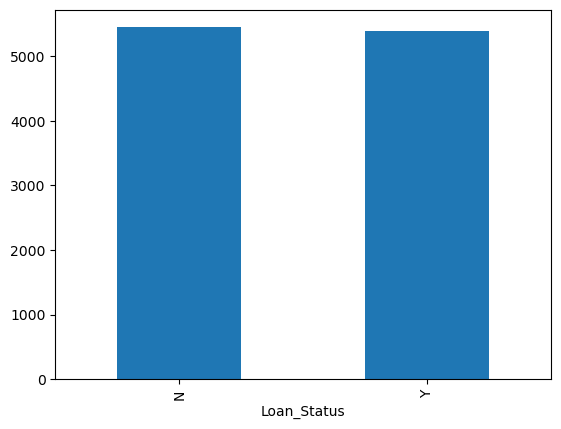

In [18]:
train_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [19]:
train_data['Dependents'].replace('3+',3,inplace = True)
test_data['Dependents'].replace('3+',3,inplace = True)
train_data['Loan_Status'].replace('N',0,inplace = True)
train_data['Loan_Status'].replace('Y',1,inplace = True)

<Axes: >

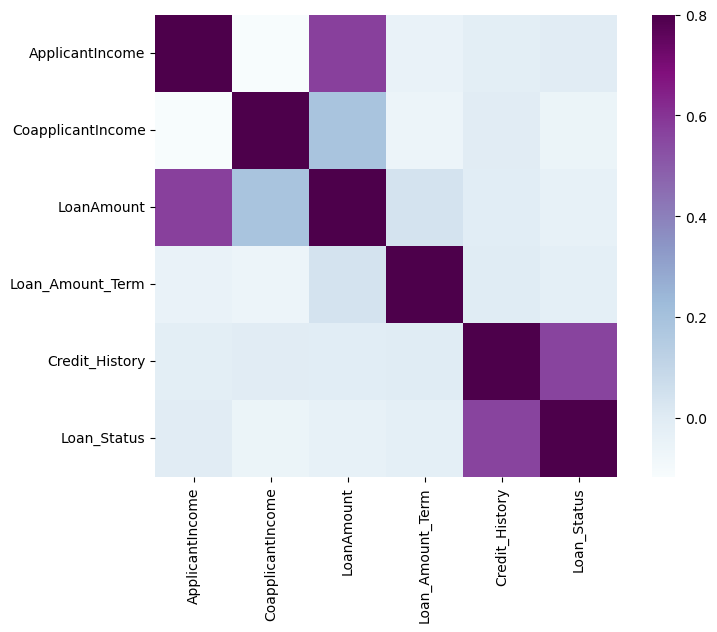

In [20]:
matrix = train_data.corr() 
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu')

# Treating missing value 

In [21]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace = True)
train_data['Married'].fillna(train_data['Married'].mode()[0],inplace = True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace = True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace = True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace = True)

In [23]:
train_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0],inplace = True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace = True)

In [25]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [27]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0],inplace = True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0],inplace = True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0],inplace = True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0],inplace = True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0],inplace = True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(),inplace = True)

In [28]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

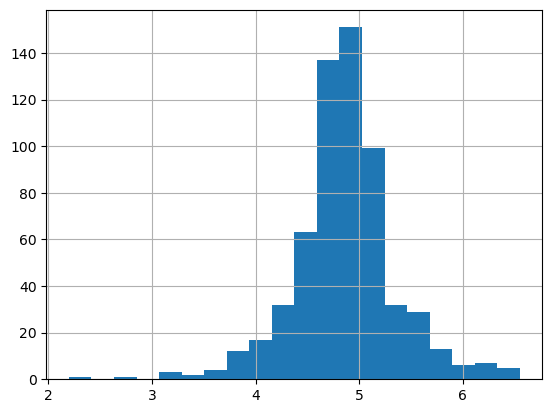

In [30]:
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
train_data['LoanAmount_log'].hist(bins=20)
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])

# Model Building

In [31]:
train_data=train_data.drop('Loan_ID', axis =1)
test_data=test_data.drop('Loan_ID', axis =1)

In [32]:
x= train_data.drop('Loan_Status',1)
y= train_data.Loan_Status

In [33]:
x = pd.get_dummies(x)
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.3)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [37]:
LogisticRegression(C=1.0, class_weight=None, dual=False,fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='ovr',n_jobs=1, penalty='12',random_state=1,solver='liblinear',tol=0.0001, verbose=0,warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [38]:
pred_cv = model.predict(x_cv)

In [39]:
accuracy_score(y_cv,pred_cv)

0.8

In [40]:
pred_test = model.predict(test_data)

In [41]:
submission=pd.read_csv('E:\Downloads\sample_submission_49d68Cx.csv')

In [42]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_og['Loan_ID']

In [43]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [44]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [45]:
from sklearn.model_selection import StratifiedKFold

In [46]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl= x.iloc[train_index],x.iloc[test_index]
    ytr,yvl= y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score= accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test_data)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


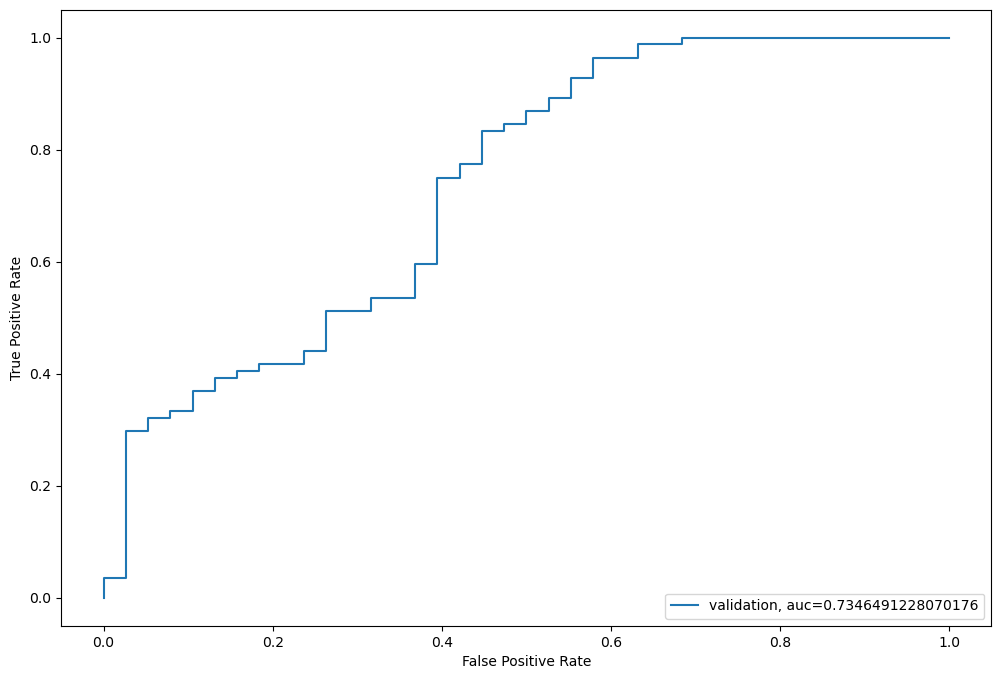

In [49]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [50]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_og['Loan_ID']

In [67]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [52]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

In [53]:
train_data['Total_Income'] =train_data['ApplicantIncome']+train_data['CoapplicantIncome']
test_data['Total_Income'] =test_data['ApplicantIncome']+test_data['CoapplicantIncome']

<Axes: xlabel='Total_Income', ylabel='Density'>

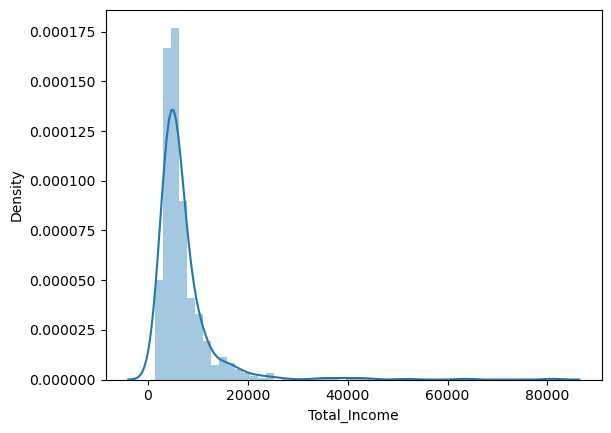

In [54]:
sns.distplot(train_data['Total_Income'])

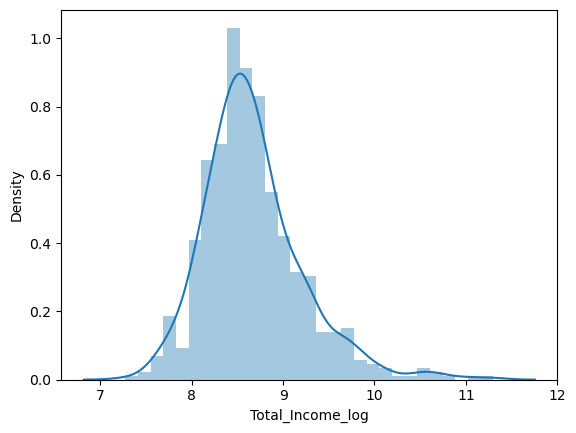

In [57]:
train_data['Total_Income_log'] = np.log(train_data['Total_Income'])
sns.distplot(train_data['Total_Income_log']);
test_data['Total_Income_log'] = np.log(test_data['Total_Income'])

In [58]:
train_data['EMI'] =train_data['LoanAmount']/train_data['Loan_Amount_Term']
test_data['EMI'] = test_data['LoanAmount']/test_data['Loan_Amount_Term']

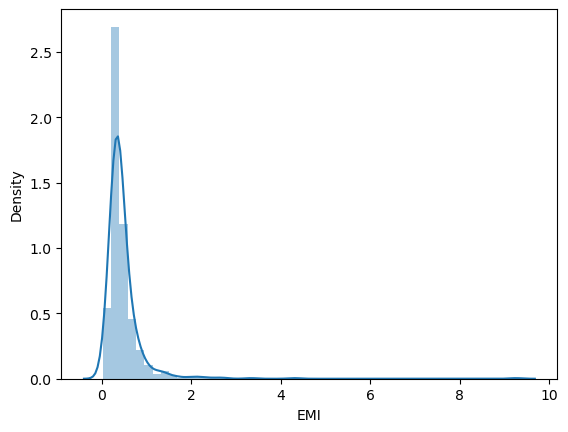

In [59]:
sns.distplot(train_data['EMI']);


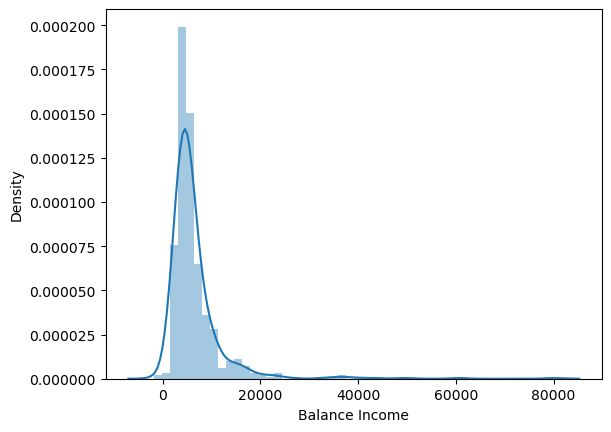

In [61]:
train_data['Balance Income'] = train_data['Total_Income']-(train_data['EMI']*1000)
test_data['Balance Income'] = test_data['Total_Income']-(test_data['EMI']*1000)
sns.distplot(train_data['Balance Income']);

In [62]:
train_data = train_data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test_data = test_data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [65]:
x= train_data.drop('Loan_Status',1)
y = train_data.Loan_Status

In [71]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl= x.iloc[train_index],x.iloc[test_index]
    ytr,yvl= y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score= accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test_data)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459


In [68]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_og['Loan_ID']

In [69]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [70]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

# Decision Tree

In [72]:
from sklearn import tree 

In [73]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl= x.iloc[train_index],x.iloc[test_index]
    ytr,yvl= y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score= accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test_data)
    


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459


In [74]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_og['Loan_ID']

In [75]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [76]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('decision_tree.csv')

# Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl= x.iloc[train_index],x.iloc[test_index]
    ytr,yvl= y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score= accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test_data)


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459
